# Predicting NBA Games using Twitter Sentiment Analysis

### COSC76 - Data Mining & Knowledge Discovery

## Nicholas Irwin


### Libraries Used:

- Pandas
- Numpy
- snscrape
- Tweepy
- Requests
- NLTK
- sklearn
- Matplotlib

In [1]:
import os
import pandas as pd
import numpy as np

In [32]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [3]:
def create_command(num_tweets,start_date,end_date,query,filename):

    command="snscrape --max-results "+num_tweets+" --since "+start_date+" twitter-search "+'"'+query+" until:"+end_date+'" > '+filename
    return command

# command=create_command('50','2018-10-17','2018-10-18','Lakers lang:en','lakers-18-19-game1.txt')

In [4]:
import tweepy

consumer_key='I9MAEamzxtjPUYlvp9FTTFlAE'
consumer_secret= 'TzbxXtXMfOz0QzaaVz53nny2vmJmfZ6Im36KiHav1uYG2JUgwM'
access_token= '1349400132912099329-nfVXMlB3FSs24z3m3V7LyPUpx0MyzS' 
access_token_secret= 'zfc3Vv2WHo3RQMrkar6rFuuzkIXCGqyDXxCLb9c22HQhc'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
import requests

def create_team_df(url):
    html=requests.get(url)
    page_content=html.content
    table=pd.read_html(page_content)
    results=table[0]
    results_list=results[2]
    results_list_cleaned=list(results_list[1:])
    list2=[]
    for result in results_list_cleaned:
        list2.append(result[:1])
    
    list3=list2[:41]
    
    num_games=list(range(41))
    team_df=pd.DataFrame(index=num_games, columns=['Pos Sentiment','Neg Sentiment','Neu Sentiment','Compound Sentiment','Category'])
    team_df['Category']=list3
    team_df['Result']=[1 if o=='W' else 0 for o in team_df['Category']]
    
    return team_df


pistons_url="https://www.espn.in/nba/team/schedule/_/name/Det/season/2019/seasontype/2"
pistons_df=create_team_df(pistons_url)

lakers_url="https://www.espn.com/nba/team/schedule/_/name/lal/season/2019"
lakers_df=create_team_df(lakers_url)

pistons_df.head()


,Pos Sentiment,Neg Sentiment,Neu Sentiment,Compound Sentiment,Category,Result
0,NaN,NaN,NaN,NaN,W,1
1,NaN,NaN,NaN,NaN,W,1
2,NaN,NaN,NaN,NaN,W,1
3,NaN,NaN,NaN,NaN,W,1
4,NaN,NaN,NaN,NaN,L,0


In [6]:
# excluding the second of back-to-back games--NOT -- would mess up inputting of W/L from html
lakers_dates=[('2018-10-17','2018-10-18'),('2018-10-19','2018-10-20'),('2018-10-21','2018-10-22'),
              ('2018-10-23','2018-10-24'),('2018-10-24','2018-10-25'),('2018-10-26','2018-10-27'),
              ('2018-10-28','2018-10-29'),('2018-10-30','2018-10-31'),('2018-11-02','2018-11-03'),
              ('2018-11-03','2018-11-04'),('2018-11-06','2018-11-07'),('2018-11-09','2018-11-10'),
              ('2018-11-10','2018-11-11'),('2018-11-13','2018-11-14'),('2018-11-16','2018-11-17'),
              ('2018-11-17','2018-11-18'),('2018-11-20','2018-11-21'),('2018-11-22','2018-11-23'),
              ('2018-11-24','2018-11-25'),('2018-11-26','2018-11-27'),('2018-11-28','2018-11-29'),
              ('2018-11-29','2018-11-30'),('2018-12-01','2018-12-02'),('2018-12-04','2018-12-05'),
              ('2018-12-06','2018-12-07'),('2018-12-07','2018-12-08'),('2018-12-09','2018-12-10'),
              ('2018-12-12','2018-12-13'),('2018-12-14','2018-12-15'),('2018-12-15','2018-12-16'),
              ('2018-12-17','2018-12-18'),('2018-12-20','2018-12-21'),('2018-12-22','2018-12-23'),
              ('2018-12-24','2018-12-25'),('2018-12-26','2018-12-27'),('2018-12-27','2018-12-28'),
              ('2018-12-29','2018-12-30'),('2019-01-01','2019-01-02'),('2019-01-03','2019-01-04'),
              ('2019-01-05','2019-01-06'),('2019-01-06','2019-01-07')]

In [7]:
pistons_dates=[('2018-10-16','2018-10-17'),('2018-10-19','2018-10-20'),('2018-10-22','2018-10-23'),
               ('2018-10-24','2018-10-25'),('2018-10-26','2018-10-27'),('2018-10-29','2018-10-30'),
               ('2018-10-30','2018-10-31'),('2018-11-02','2018-11-03'),('2018-11-04','2018-11-05'),
               ('2018-11-06','2018-11-07'),('2018-11-08','2018-11-09'),('2018-11-10','2018-11-11'),
               ('2018-11-13','2018-11-14'),('2018-11-18','2018-11-19'),('2018-11-20','2018-11-21'),
               ('2018-11-22','2018-11-23'),('2018-11-24','2018-11-25'),('2018-11-26','2018-11-27'),
               ('2018-11-29','2018-11-30'),('2018-11-30','2018-12-01'),('2018-12-02','2018-12-03'),
               ('2018-12-04','2018-12-05'),('2018-12-06','2018-12-07'),('2018-12-08','2018-12-09'),
               ('2018-12-09','2018-12-10'),('2018-12-11','2018-12-12'),('2018-12-14','2018-12-15'),
               ('2018-12-16','2018-12-17'),('2018-12-18','2018-12-19'),('2018-12-20','2018-12-21'),
               ('2018-12-22','2018-12-23'),('2018-12-25','2018-12-26'),('2018-12-27','2018-12-28'),
               ('2018-12-29','2018-12-30'),('2018-12-31','2019-01-01'),('2019-01-01','2019-01-02'),
               ('2019-01-04','2019-01-05'),('2019-01-06','2019-01-07'),('2019-01-08','2019-01-09'),
               ('2019-01-09','2019-01-10'),('2019-01-11','2019-01-12')]

games_list=list(range(1,42))

def create_tweet_files(search_n_str,team_dates,team_name):
    team_start_list=(date[0] for date in team_dates)
    team_end_list=(date[1] for date in team_dates)
    
    for start, end, game in zip(team_start_list,team_end_list,games_list):
        command=create_command(search_n_str,start,end,team_name+' lang:en',team_name+'-18-19-game'+str(game)+'.txt')
        os.system(command)

create_tweet_files('50',pistons_dates,"Pistons")

In [8]:
create_tweet_files('50',lakers_dates,"Lakers")

In [9]:
#I FOUND THE OS.LISTDIR AND OS.PATH.JOIN FUNCTIONALITIES ON STACK EXCHANGE
#I WAS GOING TO MAKE A LIST OF THE FILENAMES BUT I KNEW THERE HAD TO BE A WAY TO LOOP THRU FILES IN A DIRECTORY

# for each txt file(each game), make list of tweet ids by reading and parsing txt file
lakers_lol_tweet_ids=[]

for filename in os.listdir('./lakers_games_tweets'):
    tweet_ids=[]
    if filename.endswith('.txt'):
        with open(os.path.join('./lakers_games_tweets', filename)) as fin:
            lines=fin.readlines()
            for line in lines:
                line=line.replace('\n','')
                line=line.split('/')
                tweet_id=line[-1]
                tweet_ids.append(tweet_id)
        lakers_lol_tweet_ids.append(tweet_ids)

41

In [10]:
pistons_lol_tweet_ids=[]

for filename in os.listdir('./pistons_games_tweets'):
    
    tweet_ids=[]
    if filename.endswith('.txt'):
        with open(os.path.join('./pistons_games_tweets', filename)) as fin:
            lines=fin.readlines()
            for line in lines:
                line=line.replace('\n','')
                line=line.split('/')
                tweet_id=line[-1]
                tweet_ids.append(tweet_id)
        pistons_lol_tweet_ids.append(tweet_ids)

41

In [11]:
print(lakers_lol_tweet_ids[0])

['1074091709091450881', '1074091687880749056', '1074091677550288896', '1074091624022638592', '1074091469517012992', '1074091464781643781', '1074091444699316224', '1074091384913580032', '1074091347252981761', '1074091298703826945', '1074091286163013634', '1074091257771610112', '1074091221633634306', '1074091217087053825', '1074091146094116864', '1074091140113096704', '1074091060001992706', '1074091052510953473', '1074091010366599168', '1074090995791396864', '1074090958889848832', '1074090933287817217', '1074090919069212673', '1074090908180725760', '1074090762722205696', '1074090736348487686', '1074090730866511874', '1074090680698454017', '1074090679876444160', '1074090665200500736', '1074090599236685824', '1074090540445126657', '1074090529615462405', '1074090484170141696', '1074090438640979968', '1074090436229296130', '1074090388921683968', '1074090322882424832', '1074090318608388096', '1074090285934829568', '1074090261892874240', '1074090220059009024', '1074090185044971523', '107409013

In [12]:
import statistics
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer=SentimentIntensityAnalyzer()

def fill_team_df(lol_tweet_ids,team_df):
    
    for tweet_ids in lol_tweet_ids:
        i=lol_tweet_ids.index(tweet_ids)
        # make empty list of tweet compound sentiments
        pos_list=[]
        neg_list=[]
        neu_list=[]
        compound_list=[]
        
        if len(tweet_ids)>0:
            tweet_statuses=api.statuses_lookup(tweet_ids)

            for tweet in tweet_statuses:

                tweet=tweet._json

                pos_list.append(analyzer.polarity_scores(tweet['text'])['pos'])
                neg_list.append(analyzer.polarity_scores(tweet['text'])['neg'])
                neu_list.append(analyzer.polarity_scores(tweet['text'])['neu'])
                compound_list.append(analyzer.polarity_scores(tweet['text'])['compound'])

            for (x,y) in zip(pos_list,neg_list):
                if x==0:
                    pos_list.remove(x)
                if y==0:
                    neg_list.remove(y)
            
            for (w,z) in zip(neu_list,compound_list):
                if w==0:
                    neu_list.remove(w)
                if z==0:
                    compound_list.remove(z)

            team_df['Pos Sentiment'][i]=statistics.mean(pos_list)
            team_df['Neg Sentiment'][i]=statistics.mean(neg_list)
            team_df['Neu Sentiment'][i]=statistics.mean(neu_list)
            team_df['Compound Sentiment'][i]=statistics.mean(compound_list)
        

    return team_df
        
lakers_df2=fill_team_df(lakers_lol_tweet_ids,lakers_df)
lakers_df2.head()

<ipython-input-12-536aee2d2e9b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Pos Sentiment'][i]=statistics.mean(pos_list)
<ipython-input-12-536aee2d2e9b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Neg Sentiment'][i]=statistics.mean(neg_list)
<ipython-input-12-536aee2d2e9b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Neu Sentiment'][i]=statistics.mean(neu_list)
<ipython-input-12-536aee2d2e9b>

,Pos Sentiment,Neg Sentiment,Neu Sentiment,Compound Sentiment,Category,Result
0,0.1574,0.0578462,0.85974,0.214869,L,0
1,0.174212,0.0919655,0.828224,0.168839,L,0
2,0.130567,0.0905714,0.868327,0.1334,L,0
3,0.177344,0.0848077,0.835833,0.241876,W,1
4,0.148667,0.103172,0.847898,0.139578,W,1


In [13]:
pistons_df2=fill_team_df(pistons_lol_tweet_ids,pistons_df)
pistons_df2.head(10)

<ipython-input-12-536aee2d2e9b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Pos Sentiment'][i]=statistics.mean(pos_list)
<ipython-input-12-536aee2d2e9b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Neg Sentiment'][i]=statistics.mean(neg_list)
<ipython-input-12-536aee2d2e9b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Neu Sentiment'][i]=statistics.mean(neu_list)
<ipython-input-12-536aee2d2e9b>

,Pos Sentiment,Neg Sentiment,Neu Sentiment,Compound Sentiment,Category,Result
0,0.199656,0.0797143,0.816553,0.205835,W,1
1,0.13,0.0619655,0.883735,0.141265,W,1
2,0.104417,0.0668214,0.88742,0.149149,W,1
3,0.126484,0.0698462,0.880521,0.1178,W,1
4,0.130259,0.0783103,0.879417,0.0932258,L,0
5,0.137121,0.0577692,0.87942,0.19095,L,0
6,0.123687,0.050963,0.89334,0.1594,L,0
7,0.102933,0.0738621,0.893245,0.0738,L,0
8,0.138031,0.0962333,0.847854,0.0884829,L,0
9,0.155538,0.07468,0.838102,0.25565,W,1


In [14]:
# combine dataframes from both teams, get rid of NaNs
team_frames=[lakers_df2,pistons_df2]
final_df=pd.concat(team_frames,ignore_index=True)

final_df=final_df.dropna()

final_df

,Pos Sentiment,Neg Sentiment,Neu Sentiment,Compound Sentiment,Category,Result
0,0.1574,0.0578462,0.85974,0.214869,L,0
1,0.174212,0.0919655,0.828224,0.168839,L,0
2,0.130567,0.0905714,0.868327,0.1334,L,0
3,0.177344,0.0848077,0.835833,0.241876,W,1
4,0.148667,0.103172,0.847898,0.139578,W,1
...,...,...,...,...,...,...
77,0.148088,0.0741,0.85482,0.174618,L,0
78,0.0641111,0.110154,0.904333,-0.1245,L,0
79,0.186083,0.05925,0.83286,0.32333,L,0
80,0.155581,0.107517,0.827348,0.0837914,L,0


In [15]:
x_df_four=final_df[['Pos Sentiment','Neg Sentiment','Neu Sentiment','Compound Sentiment']]
x_array_four=x_df_four.to_numpy()

In [16]:
x_df_compound=final_df[['Compound Sentiment']]
x_array_compound=x_df_compound.to_numpy()

In [17]:
x_df_pos=final_df[['Pos Sentiment']]
x_array_pos=x_df_pos.to_numpy()
# x_array

In [18]:
x_df_neg=final_df[['Neg Sentiment']]
x_array_neg=x_df_neg.to_numpy()

In [19]:
x_df_neu=final_df[['Neu Sentiment']]
x_array_neu=x_df_neu.to_numpy()

In [20]:
# now build and test as many models as possible on this dataset
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer


models_features_list=["Logistic Regression Four","Random Forest Four","K Nearest Neighbours(3) Four","K Nearest Neighbours (5) Four",
                      "Logistic Regression Pos","Random Forest Pos","K Nearest Neighbours(3) Pos","K Nearest Neighbours (5) Pos",
                      "Logistic Regression Neg","Random Forest Neg","K Nearest Neighbours(3) Neg","K Nearest Neighbours (5) Neg",
                      "Logistic Regression Neu","Random Forest Neu","K Nearest Neighbours(3) Neu","K Nearest Neighbours (5) Neu",
                      "Logistic Regression Compound","Random Forest Compound","K Nearest Neighbours(3) Compound","K Nearest Neighbours (5) Compound",
            
                     ]

models_df=pd.DataFrame(index=models_features_list,columns=['F1 Default List','F1 Weighted List','Model Accuracy'])

# Train and evaluate (using 5-fold cross validation) the following models
f1_default_list=[]
f1_weighted_list=[]
model_accuracy_list=[]

def model_selector(model):
    if model=='LR':
        return LogisticRegression()
    elif model=='RF':
        return RandomForestClassifier(n_estimators=10)
    elif model=='KN3':
        return KNeighborsClassifier(n_neighbors=3)
    elif model=='KN5':
        return KNeighborsClassifier(n_neighbors=5)
    return LogisticRegression()


In [21]:
# FOUR

X_train_four, X_test_four, y_train_four, y_test_four = train_test_split(x_array_four,final_df['Result'],test_size=0.20,random_state=42)


LR_four=model_selector('LR').fit(X_train_four,y_train_four)
RF_four=model_selector('RF').fit(X_train_four,y_train_four)
KN3_four=model_selector('KN3').fit(X_train_four,y_train_four)
KN5_four=model_selector('KN5').fit(X_train_four,y_train_four)


# ALL FOUR SENTIMENT FEATURES
f1_default_list.append(cross_val_score(LR_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)
f1_default_list.append(cross_val_score(RF_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN3_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN5_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

# ALL FOUR SENTIMENT FEATURES
f1_weighted_list.append(cross_val_score(LR_four,X_train_four,y_train_four,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(RF_four,X_train_four,y_train_four,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN3_four,X_train_four,y_train_four,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN5_four,X_train_four,y_train_four,scoring=make_scorer(f1_score,average='weighted')).mean())

# ALL FOUR SENTIMENT FEATURES
model_accuracy_list.append(cross_val_score(LR_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(RF_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN3_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN5_four,X_train_four,y_train_four,scoring=make_scorer(f1_score)).mean())

[0.0]
[0.0, 0.403059163059163]
[0.0, 0.403059163059163, 0.493968253968254]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111]


In [22]:
# POS

X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(x_array_pos,final_df['Result'],test_size=0.20,random_state=42)


LR_pos=model_selector('LR').fit(X_train_pos,y_train_pos)
RF_pos=model_selector('RF').fit(X_train_pos,y_train_pos)
KN3_pos=model_selector('KN3').fit(X_train_pos,y_train_pos)
KN5_pos=model_selector('KN5').fit(X_train_pos,y_train_pos)

# ONLY POSITIVE SENTIMENT FEATURES
f1_default_list.append(cross_val_score(LR_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(RF_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN3_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN5_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)
print(len(f1_default_list))


# ONLY POSITIVE SENTIMENT FEATURES
f1_weighted_list.append(cross_val_score(LR_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(RF_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN3_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN5_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score,average='weighted')).mean())

# ONLY POSITIVE SENTIMENT FEATURES
model_accuracy_list.append(cross_val_score(LR_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(RF_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN3_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN5_pos,X_train_pos,y_train_pos,scoring=make_scorer(f1_score)).mean())

[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664]
8


In [23]:
# NEG

X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(x_array_neg,final_df['Result'],test_size=0.20,random_state=42)


LR_neg=model_selector('LR').fit(X_train_neg,y_train_neg)
RF_neg=model_selector('RF').fit(X_train_neg,y_train_neg)
KN3_neg=model_selector('KN3').fit(X_train_neg,y_train_neg)
KN5_neg=model_selector('KN5').fit(X_train_neg,y_train_neg)


# ONLY NEGATIVE SENTIMENT FEATURES
f1_default_list.append(cross_val_score(LR_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(RF_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN3_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN5_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)
print(len(f1_default_list))


# ONLY NEGATIVE SENTIMENT FEATURES
f1_weighted_list.append(cross_val_score(LR_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(RF_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN3_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN5_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score,average='weighted')).mean())

# ONLY NEGATIVE SENTIMENT FEATURES
model_accuracy_list.append(cross_val_score(LR_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(RF_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN3_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN5_neg,X_train_neg,y_train_neg,scoring=make_scorer(f1_score)).mean())

[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457]
12


In [24]:
# NEUTRAL

X_train_neu, X_test_neu, y_train_neu, y_test_neu = train_test_split(x_array_neu,final_df['Result'],test_size=0.20,random_state=42)


LR_neu=model_selector('LR').fit(X_train_neu,y_train_neu)
RF_neu=model_selector('RF').fit(X_train_neu,y_train_neu)
KN3_neu=model_selector('KN3').fit(X_train_neu,y_train_neu)
KN5_neu=model_selector('KN5').fit(X_train_neu,y_train_neu)


# ONLY NEUTRAL SENTIMENT FEATURES
f1_default_list.append(cross_val_score(LR_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(RF_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN3_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)

f1_default_list.append(cross_val_score(KN5_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
print(f1_default_list)
print(len(f1_default_list))

# ONLY NEUTRAL SENTIMENT FEATURES
f1_weighted_list.append(cross_val_score(LR_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(RF_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN3_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN5_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score,average='weighted')).mean())

# ONLY NEUTRAL SENTIMENT FEATURES
model_accuracy_list.append(cross_val_score(LR_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(RF_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN3_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN5_neu,X_train_neu,y_train_neu,scoring=make_scorer(f1_score)).mean())

[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457, 0.0]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457, 0.0, 0.47857142857142865]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457, 0.0, 0.47857142857142865, 0.47836829836829836]
[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457, 0.0, 0.47857142857142865, 0.47836829836829836, 0.38464646464646457]
16


In [25]:
# COMPOUND

X_train_compound, X_test_compound, y_train_compound, y_test_compound = train_test_split(x_array_compound,final_df['Result'],test_size=0.20,random_state=42)


LR_compound=model_selector('LR').fit(X_train_compound,y_train_compound)
RF_compound=model_selector('RF').fit(X_train_compound,y_train_compound)
KN3_compound=model_selector('KN3').fit(X_train_compound,y_train_compound)
KN5_compound=model_selector('KN5').fit(X_train_compound,y_train_compound)


# ONLY COMPOUND SENTIMENT FEATURES
f1_default_list.append(cross_val_score(LR_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
f1_default_list.append(cross_val_score(RF_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
f1_default_list.append(cross_val_score(KN3_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
f1_default_list.append(cross_val_score(KN5_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
print(len(f1_default_list))


# ONLY COMPOUND SENTIMENT FEATURES
f1_weighted_list.append(cross_val_score(LR_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(RF_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN3_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score,average='weighted')).mean())
f1_weighted_list.append(cross_val_score(KN5_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score,average='weighted')).mean())

# ONLY COMPOUND SENTIMENT FEATURES
model_accuracy_list.append(cross_val_score(LR_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(RF_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN3_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())
model_accuracy_list.append(cross_val_score(KN5_compound,X_train_compound,y_train_compound,scoring=make_scorer(f1_score)).mean())

20


In [26]:
print(f1_default_list)
# print
models_df['F1 Default List']=f1_default_list
models_df['F1 Weighted List']=f1_weighted_list
models_df['Model Accuracy']=model_accuracy_list

models_df

[0.0, 0.403059163059163, 0.493968253968254, 0.5511111111111111, 0.0, 0.32, 0.3776334776334776, 0.4664335664335664, 0.0, 0.5341549953314659, 0.4171428571428571, 0.2778542510121457, 0.0, 0.47857142857142865, 0.47836829836829836, 0.38464646464646457, 0.0, 0.4556410256410256, 0.3429470529470529, 0.3713308913308913]


,F1 Default List,F1 Weighted List,Model Accuracy
Logistic Regression Four,0.000000,0.352470,0.000000
Random Forest Four,0.403059,0.499996,0.513607
K Nearest Neighbours(3) Four,0.493968,0.546905,0.493968
K Nearest Neighbours (5) Four,0.551111,0.625486,0.551111
Logistic Regression Pos,0.000000,0.359838,0.000000
Random Forest Pos,0.320000,0.446169,0.425641
K Nearest Neighbours(3) Pos,0.377633,0.435512,0.377633
K Nearest Neighbours (5) Pos,0.466434,0.527677,0.466434
Logistic Regression Neg,0.000000,0.359838,0.000000
Random Forest Neg,0.534155,0.599240,0.585803


In [27]:
print(models_df[['F1 Weighted List']].idxmax()[0])

K Nearest Neighbours (5) Four


In [28]:
#Already fitted to X_train, and y_train
best_model=RF_neg

best_predictions=best_model.predict(X_test_compound)
prediction_probs=best_model.predict_proba(X_test_compound)

print(f1_score(y_test_compound,best_predictions,average='weighted'))

0.5701357466063348


In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test_compound,[p[1] for p in prediction_probs])

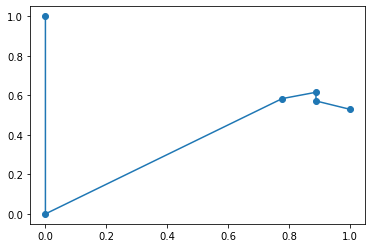

In [30]:
plt.plot(recall,precision)
plt.scatter(recall,precision)